
# Theoretical and Empirical Analysis of Algorithms


## Brute force algorithm



In [111]:
def Brute_Force(text, pattern):
    # Length of the text
    n = len(text)
    # Length of the pattern
    m = len(pattern)
    # List to store indices where pattern is found in text
    indices = []
    
    # Loop through the text
    for i in range(n - m + 1):
        # Initialize a variable to track position in pattern
        j = 0
        # Check if characters match between text and pattern
        while j < m and text[i + j] == pattern[j]:
            # Move to the next character in pattern
            j += 1
        # If the whole pattern is matched, add index to list
        if j == m:
            indices.append(i)
                
            
    # Return the list of indices where pattern is found in text
    return indices


## Knuth-Morris-Pratt’s algorithm (KMP)

In [112]:
def computeLPSArray(pat, M, lps):
    length = 0  # Length of the previous longest prefix suffix

    lps[0] = 0  # lps[0] is always 0
    i = 1

    while i < M:
        # If characters match, increase the length and store in lps array
        if pat[i] == pat[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            # If characters don't match
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
def KMPSearch(text, pattern):
    M = len(pattern)  # Length of pattern
    N = len(text)  # Length of text

    # Create and initialize the LPS (Longest Prefix Suffix) array
    lps = [0] * M
    computeLPSArray(pattern, M, lps)  # Compute the LPS array
    
    j = 0  # Index for pattern

    indices = []  # List to store indices where pattern is found

    # Traverse through the text
    i = 0
    while i < N:
        # If the characters match, move both pointers
        if pattern[j] == text[i]:
            i += 1
            j += 1

            # If the entire pattern is found
            if j == M:
                indices.append(i - M)
                j = lps[j - 1]

        else:
            # If characters don't match
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1

    # If pattern is found in the text, return the indices
    return indices

# Boyer-Moore's algorithm.


In [113]:
NO_OF_CHARS = 256  # Number of characters in the ASCII table

def badCharHeuristic(string, size):
    badChar = [-1] * NO_OF_CHARS  # Initialize the bad character array

    # Fill the bad character array with the index of the last occurrence of each character in the pattern
    for i in range(size):
        badChar[ord(string[i])] = i

    return badChar

def Boyer_Moore(txt, pat):
    m = len(pat)  # Length of pattern
    n = len(txt)  # Length of text

    badChar = badCharHeuristic(pat, m)  # Preprocess the pattern to generate the bad character heuristic table

    s = 0  # Shift in the text
    indices = []  # List to store indices where pattern is found

    while s <= n - m:
        j = m - 1  # Index of the last character in the pattern

        # Compare characters from right to left in the pattern and text
        while j >= 0 and pat[j] == txt[s + j]:
            j -= 1

        # If the pattern is found, add the index to the list
        if j < 0:
            indices.append(s)

            # Update the shift using the bad character heuristic
            s += (m - badChar[ord(txt[s + m])] if s + m < n else 1)
        else:
            # Update the shift using the maximum of 1 and the difference between the current index
            # and the value in the bad character heuristic table for the character in the text
            s += max(1, j - badChar[ord(txt[s + j])])

    # If pattern is found in the text, return the indices
    return indices

## Generate Test Data

In [114]:
import os
import random
import string

def generate_text_file(directory, filename, size):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'w') as f:
        # Generate random text of specified size
        random_text = ''.join(random.choices(string.ascii_letters + string.digits  , k=size))
        f.write(random_text)


project_dir = "/Users/ahmedalkhulayfi/VSCode-workspace/CSC311_Project/Texts Files"
size = 100
for i in range(100):
    generate_text_file(project_dir, f'random_text_{size}.txt', size)
    size += 100

## Record Running Times

In [129]:
# Record running times and store results in lists
import timeit

def read_text_files(directory):
    texts = []
    filenames = sorted(os.listdir(directory), key=lambda x: int(x.split('_')[-1].split('.')[0]))
    for filename in filenames:
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as f:
                text = f.read()
                texts.append( (text, filename))
    return texts

# Record running times and store results in lists
def record_running_times(text_directory, pattern, num_runs=5):
    texts = read_text_files(text_directory)
    output_files = []
    brute_force_times = []
    kmp_times = []
    boyer_moore_times = []

    for text , filename in texts:
        brute_force_total_time = 0
        kmp_total_time = 0
        boyer_moore_total_time = 0
        
        result_of_brute = result_of_kmp = result_of_boyer = []
        for _ in range(num_runs):
            start_time = timeit.default_timer()
            
            result_of_boyer = Boyer_Moore(text, pattern)
            boyer_moore_total_time += (timeit.default_timer() - start_time)
            
            start_time = timeit.default_timer()
            result_of_brute = Brute_Force(text, pattern)
            brute_force_total_time += (timeit.default_timer() - start_time)

            start_time = timeit.default_timer()
            result_of_kmp = KMPSearch(text , pattern)
            kmp_total_time += (timeit.default_timer() - start_time)
            
        if result_of_brute or result_of_kmp or result_of_boyer:
            output_files.append(filename )
            

        # Calculate the average running time for each algorithm
        brute_force_times.append(brute_force_total_time / num_runs)
        kmp_times.append(kmp_total_time / num_runs)
        boyer_moore_times.append(boyer_moore_total_time / num_runs)
    
    return brute_force_times, kmp_times, boyer_moore_times, output_files


## Usage Example

In [135]:
text_directory = "/Users/ahmedalkhulayfi/VSCode-workspace/CSC311_Project/Texts Files"
pattern = "AABA" 
brute_force_times, kmp_times, boyer_moore_times, output_files = record_running_times(text_directory, pattern, num_runs=10)

print("The Result Found in The Following Text Files: ", output_files)


The Result Found in The Following Text Files:  ['random_text_3700.txt', 'random_text_7800.txt']


##  Running times Vs Input size.


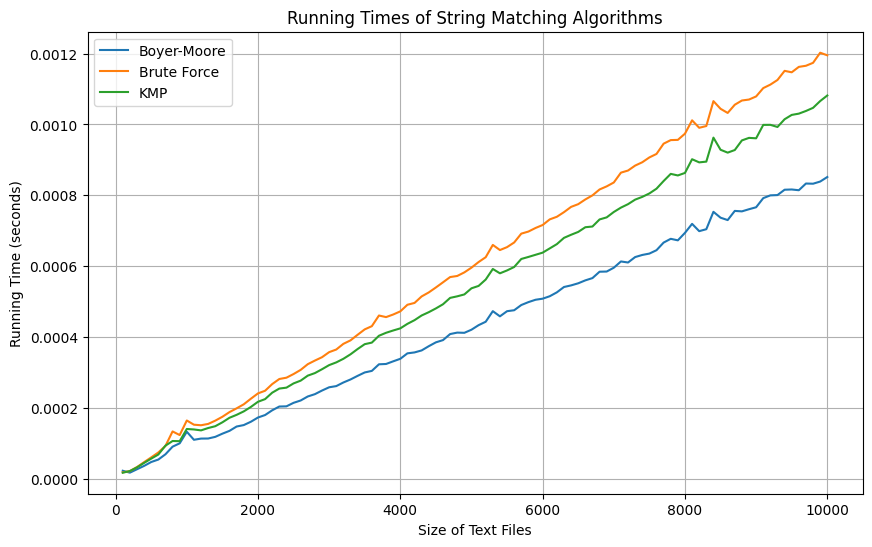

In [136]:
import matplotlib.pyplot as plt

# Function to plot running times
def plot_running_times(brute_force_times, kmp_times, boyer_moore_times):
    sizes = range(100, 10100, 100)  # Sizes of the text files

    plt.figure(figsize=(10, 6))

    
    plt.plot( sizes,boyer_moore_times, label='Boyer-Moore')
    plt.plot(sizes, brute_force_times, label='Brute Force')
    plt.plot(sizes, kmp_times, label='KMP')
    
    plt.title('Running Times of String Matching Algorithms')
    plt.xlabel('Size of Text Files')
    plt.ylabel('Running Time (seconds)')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_running_times(brute_force_times, kmp_times, boyer_moore_times)
